My dislike of the Chicago Cubs grew exponentially after the 2016 season.
Why?
One cannot doubt the Cubs have developed amazing talent and used a keen eye in acquisitions such as Kris Bryant, Javier Baez and Anthony Rizzo (there are more); it's awesome to see any team develop a group of players like that. However, I cannot overlook the expensive talents of Jon Lester, John Lackey, Ben Zobrist, Dexter Fowler and Aroldis Chapman.
I've been saying this non-stop since October 2016: The Chicago Cubs purchased their 2016 World Series Ring.
But does this hold up? Does how much a team spend on talent increase the odds of winning? Do the big-market teams really have an edge in this game? We'll use the data to see the league payroll ranking of each World Series winner in the respective year.
Originally, I wanted to use all WS and payroll data since the Modern Era, however, we only have salaries from 1985 onward

In [10]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



,year,name,payroll,payroll_rank
1927,1985,Kansas City Royals,9321179.0,17.0
1959,1986,New York Mets,15393714.0,4.0
1981,1987,Minnesota Twins,6397500.0,24.0
2006,1988,Los Angeles Dodgers,16850515.0,2.0
2038,1989,Oakland Athletics,15613070.0,8.0
2053,1990,Cincinnati Reds,14370000.0,21.0
2085,1991,Minnesota Twins,23361833.0,12.0
2124,1992,Toronto Blue Jays,44788666.0,1.0
2152,1993,Toronto Blue Jays,47279166.0,1.0
2181,1995,Atlanta Braves,47235445.0,3.0


In [ ]:
#Getting the data from CSV files
salary = pd.read_csv("D:/Users/vin/Desktop/FinalProject-Python/the-history-of-baseball/salary.csv")
teams = pd.read_csv("D:/Users/vin/Desktop/FinalProject-Python/the-history-of-baseball/team.csv")

In [12]:
groupedSalary = salary[salary['year'] >= 1985]['salary'].groupby([salary['year'], salary['team_id']]).sum()
wsWinners = teams[(teams['year'] >= 1985) & (teams['ws_win'] == 'Y')][['year', 'team_id', 'name']]

for index, row in wsWinners.iterrows():
    yearlySalaries = groupedSalary[row['year']]
    wsWinners.set_value(index, 'payroll', yearlySalaries[row['team_id']])
    wsWinners.set_value(index, 'payroll_rank', yearlySalaries.rank(ascending=False)[row['team_id']])
    
wsWinners[['year', 'name', 'payroll', 'payroll_rank']]

,year,name,payroll,payroll_rank
1927,1985,Kansas City Royals,9321179.0,17.0
1959,1986,New York Mets,15393714.0,4.0
1981,1987,Minnesota Twins,6397500.0,24.0
2006,1988,Los Angeles Dodgers,16850515.0,2.0
2038,1989,Oakland Athletics,15613070.0,8.0
2053,1990,Cincinnati Reds,14370000.0,21.0
2085,1991,Minnesota Twins,23361833.0,12.0
2124,1992,Toronto Blue Jays,44788666.0,1.0
2152,1993,Toronto Blue Jays,47279166.0,1.0
2181,1995,Atlanta Braves,47235445.0,3.0


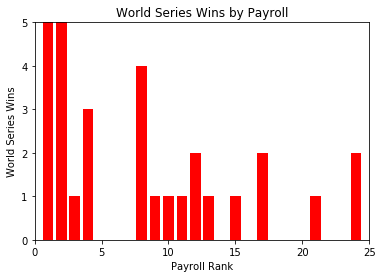

In [11]:
winData = wsWinners['payroll_rank'].value_counts().reset_index()
winData.columns = ['payroll_rank', 'win_count']

plt.bar(winData['payroll_rank'], winData['win_count'], color = 'red')
plt.axis([0, 25, 0, 5])
plt.ylabel('World Series Wins')
plt.xlabel('Payroll Rank')
plt.title('World Series Wins by Payroll')

Takeaways
As most of us thought, yes, there is a clear correlation between money spent on a roster and a Championship.
Almost half of all World Series' champions since 1985 have been in the top 4 of league payroll; including 2016 data would increase this number.
I would like to see money spent on management included in these numbers at some point.
Fun Fact/Bang For The Buck: The Kansas City Royals have won the World Series in 1985 and 2015; both times they were ranked 17 in league payroll.